## Dataset 3 : Restaurant Revenue Prediction 
## Student ID : x20165749 
## Name : Veeresh Shivabasappa Kumbi 
## MSc in Data Analytics

In [202]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [203]:
train_df = pd.read_csv("C:/Users/Shivasheela/Desktop/DMML Project/restaurant-revenue-prediction/train.csv/train.csv")
train_df.shape

(137, 43)

In [204]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [205]:
test_df = pd.read_csv("C:/Users/Shivasheela/Desktop/DMML Project/restaurant-revenue-prediction/test.csv/test.csv")
test_df.shape

(100000, 42)

In [206]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


 ## Lets consider the Training set for analysis


In [207]:
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [208]:
def display_all(train_df):
    with pd.option_context("display.max_rows",1000, "display.max_columns",1000):
         display(train_df)
display_all(train_df.head().transpose())

,0,1,2,3,4
Id,0,1,2,3,4
Open Date,07/17/1999,02/14/2008,03/09/2013,02/02/2012,05/09/2009
City,İstanbul,Ankara,Diyarbakır,Tokat,Gaziantep
City Group,Big Cities,Big Cities,Other,Other,Other
Type,IL,FC,IL,IL,IL
P1,4,4,2,6,3
P2,5,5,4,4.5,4
P3,4,4,2,6,3
P4,4,4,5,6,4
P5,2,1,2,4,2


In [209]:
#Finding the null count
train_df.isnull().sum().sort_index()/len(train_df)

City          0.0
City Group    0.0
Id            0.0
Open Date     0.0
P1            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P2            0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
P28           0.0
P29           0.0
P3            0.0
P30           0.0
P31           0.0
P32           0.0
P33           0.0
P34           0.0
P35           0.0
P36           0.0
P37           0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
Type          0.0
revenue       0.0
dtype: float64

 We Can infer that there are no null values

C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-210-40ab1c44ec47>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


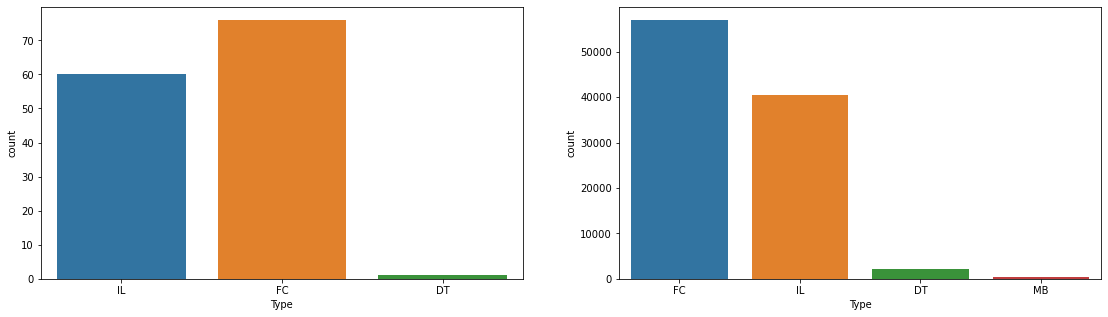

In [210]:
# lets plot the graph against type and count of the restaurant

fig, ax= plt.subplots(1,2, figsize=(19,5))
graph1 = sns.countplot(train_df['Type'],ax=ax[0]);
graph1 = sns.countplot(test_df['Type'],ax=ax[1]);
fig.show()

C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-211-bdf0f7c43705>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


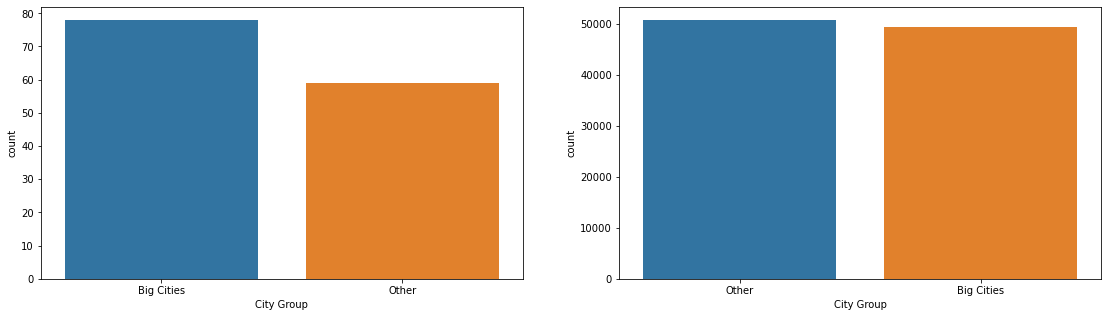

In [211]:
# lets plot the against city group and count of the restaurant

fig, ax= plt.subplots(1,2, figsize=(19,5))
graph1 = sns.countplot(train_df['City Group'],ax=ax[0]);
graph1 = sns.countplot(test_df['City Group'],ax=ax[1]);
fig.show()

In [212]:
# Step to find the unique count of city from test and train dataset
(train_df['City'].nunique(),test_df['City'].nunique())

(34, 57)

The MB Type will be replaced with the DT Type in the test set since it's not available in our training set. The City feature is useless since our training set contains 34 unique cities but the test set contains 57 unique cities.

In [213]:
#Replacing MB with DT
test_df.loc[test_df['Type']=='MB', 'Type'] = 'DT'

In [214]:
train_df.drop('City', axis=1, inplace=True)
test_df.drop('City', axis=1, inplace=True)

The opening date is the date the restaurant first opened. It won’t be of much use in terms of predicting revenue but it would be useful to know how long the restaurant has been open since the opening date. For that reason, I decided to use March 23, 2015 as the date of comparison to calculate the amount of days the restaurant has been open. Then, I chose to downscale the number of days open by a factor of 1000 to slightly improve model performance.

In [215]:
import datetime
train_df.drop('Id',axis=1,inplace=True)
train_df['Open Date']  = pd.to_datetime(train_df['Open Date'])
test_df['Open Date']  = pd.to_datetime(test_df['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
train_df['Days Open'] = (launch_date - train_df['Open Date']).dt.days / 1000
test_df['Days Open'] = (launch_date - test_df['Open Date']).dt.days / 1000
train_df.drop('Open Date', axis=1, inplace=True)
test_df.drop('Open Date', axis=1, inplace=True)

C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-216-ad7d5a693fea>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


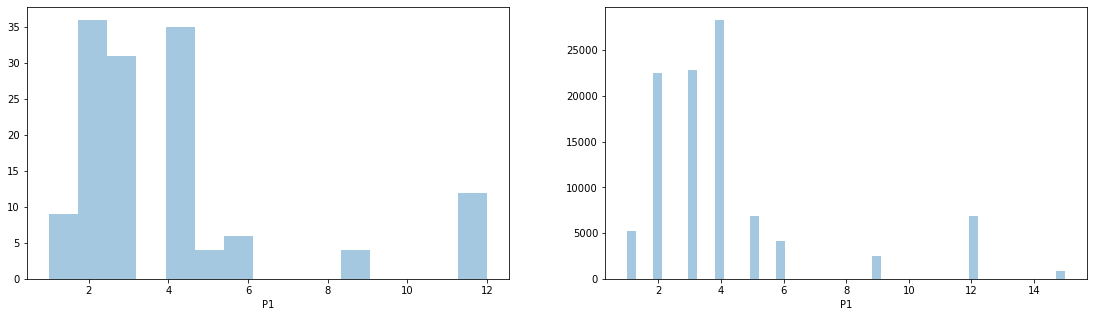

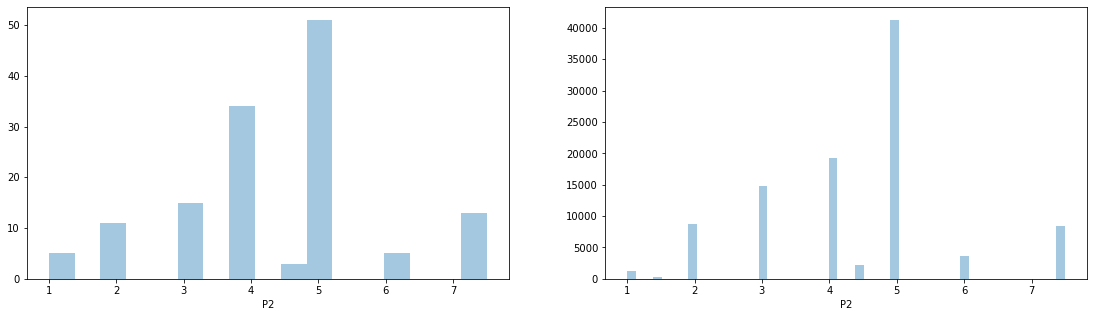

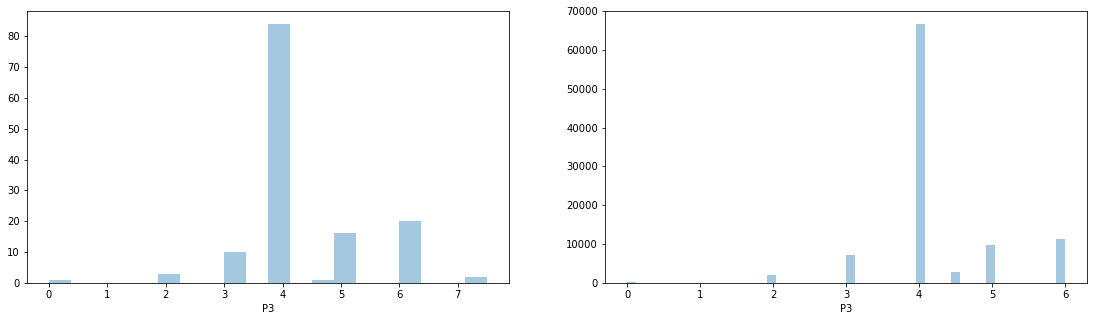

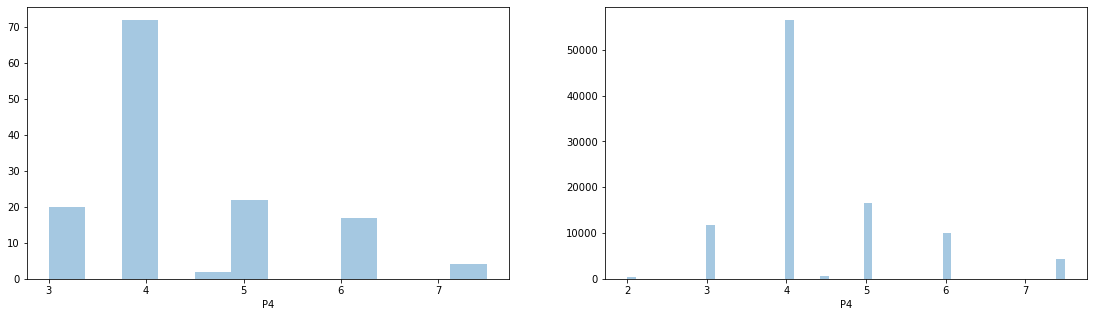

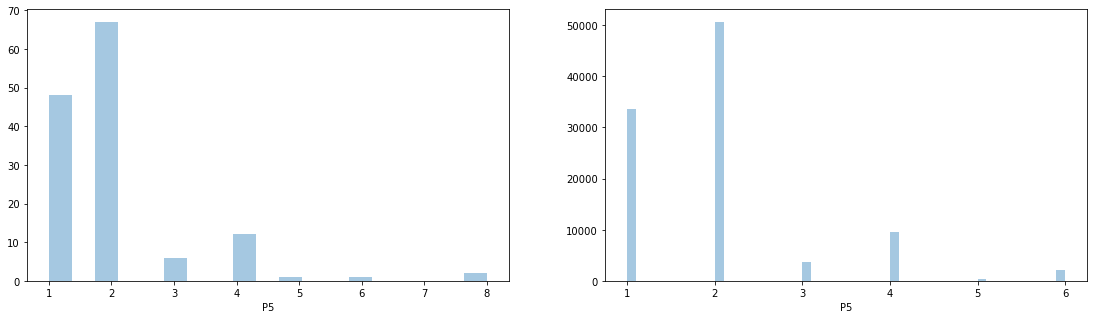

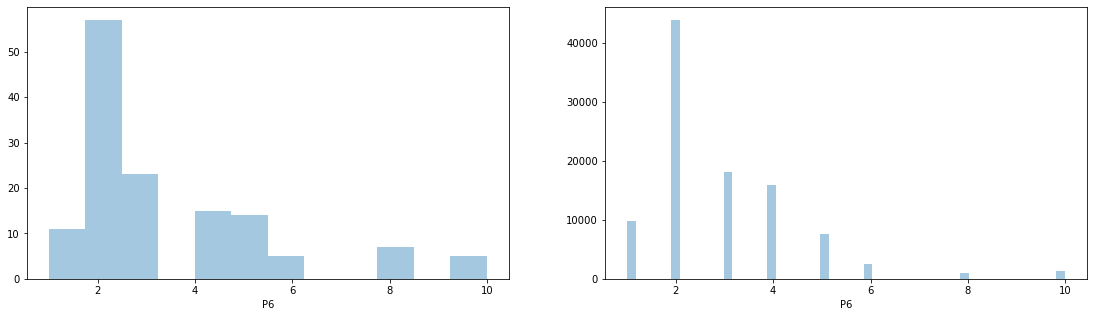

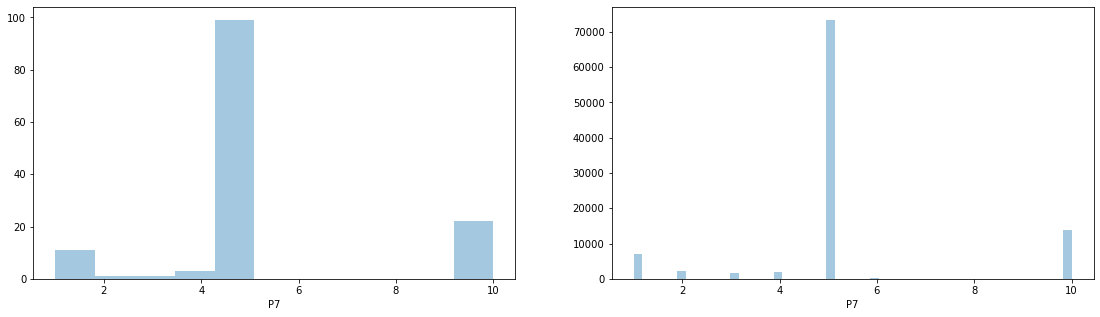

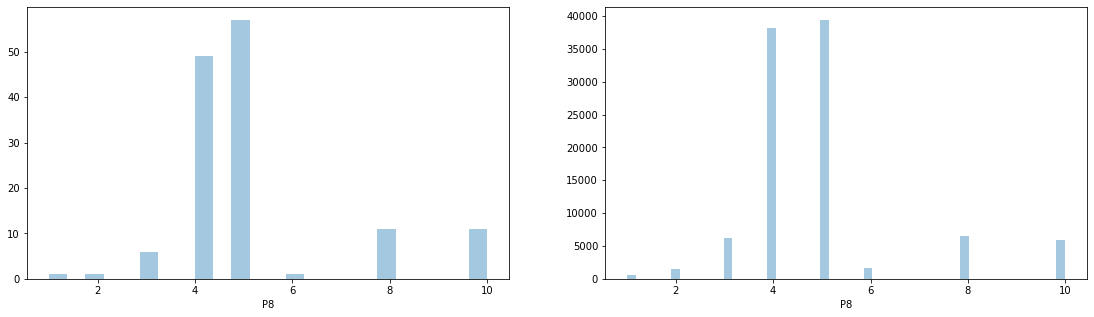

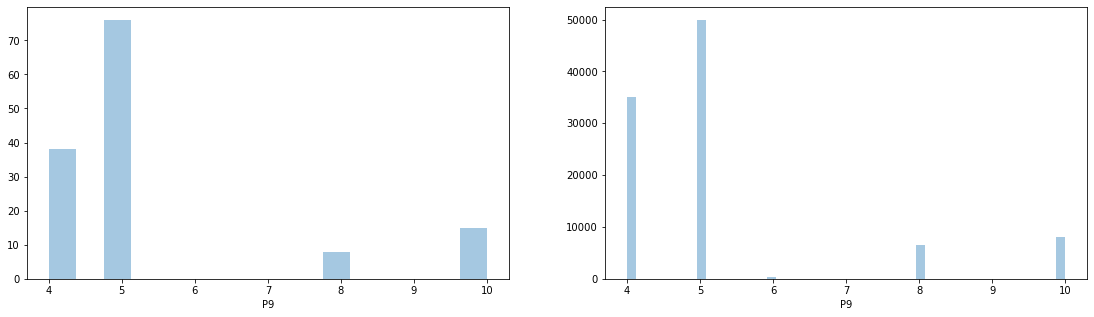

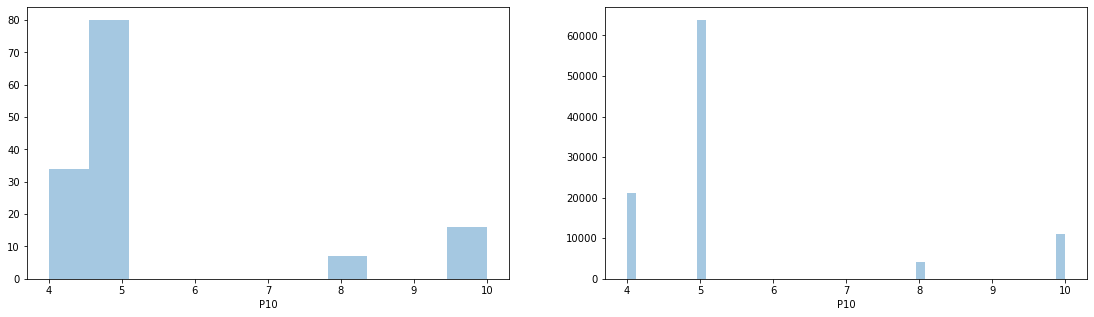

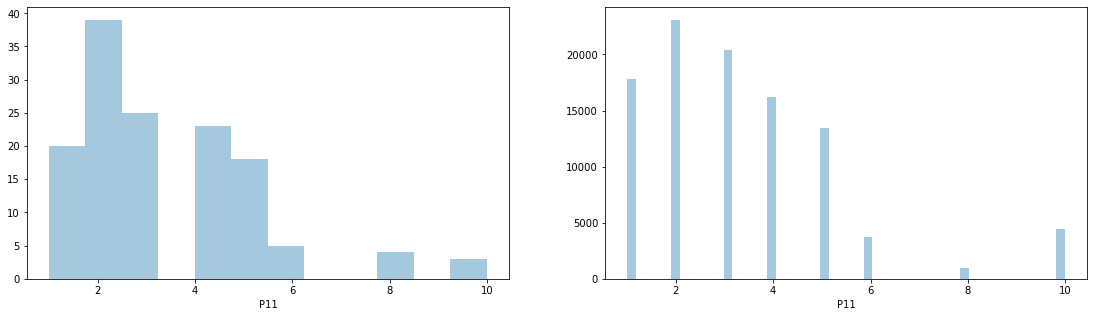

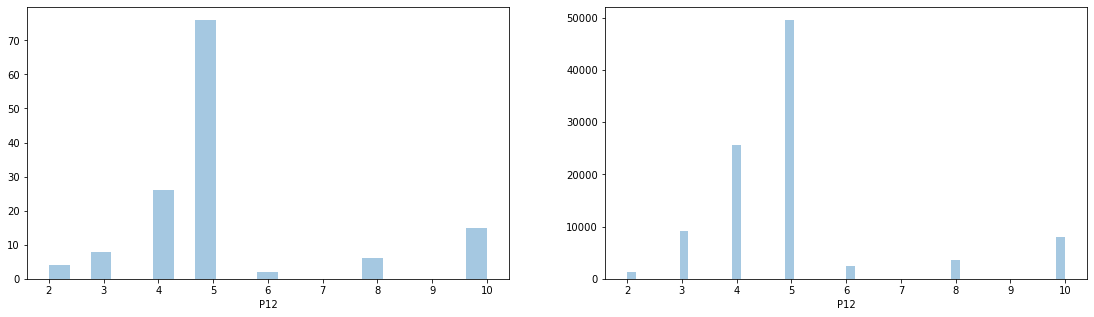

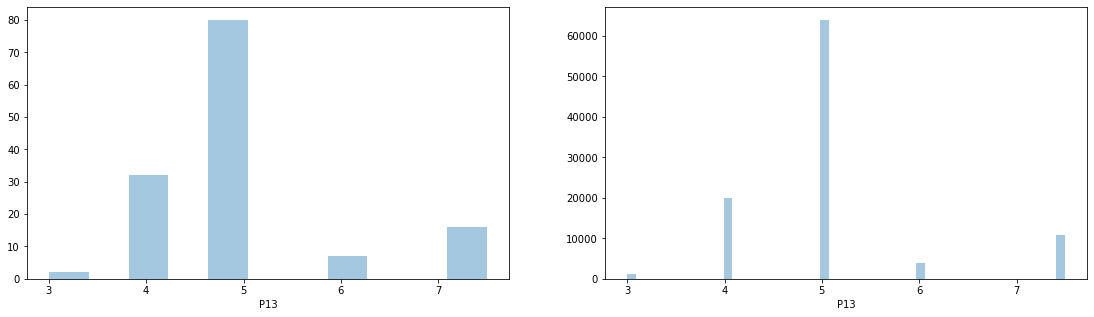

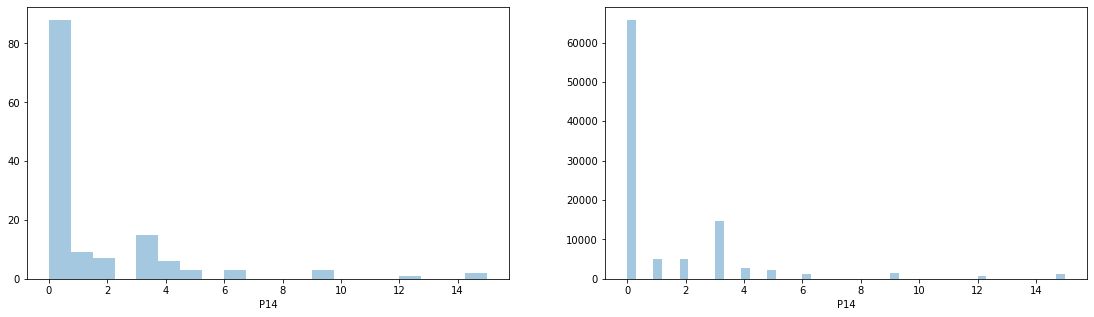

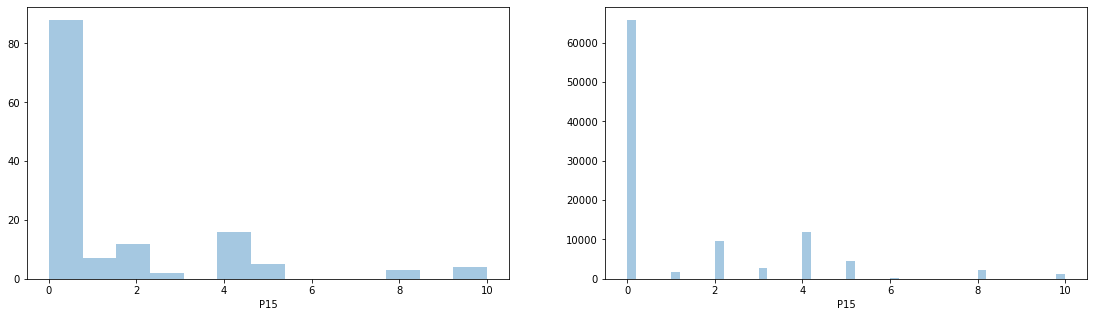

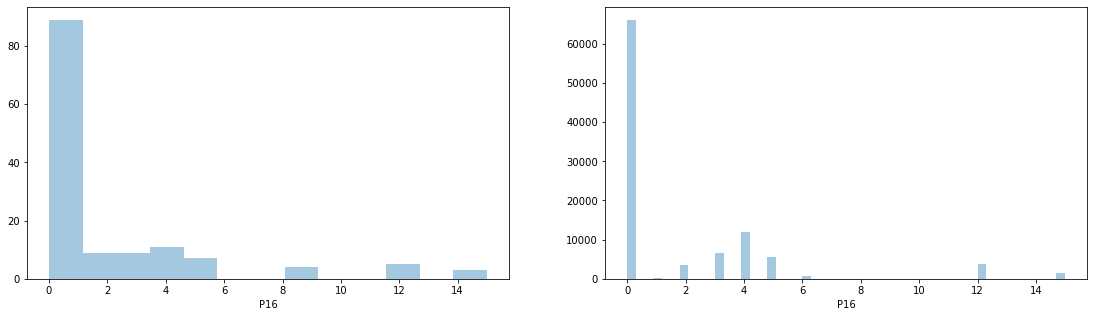

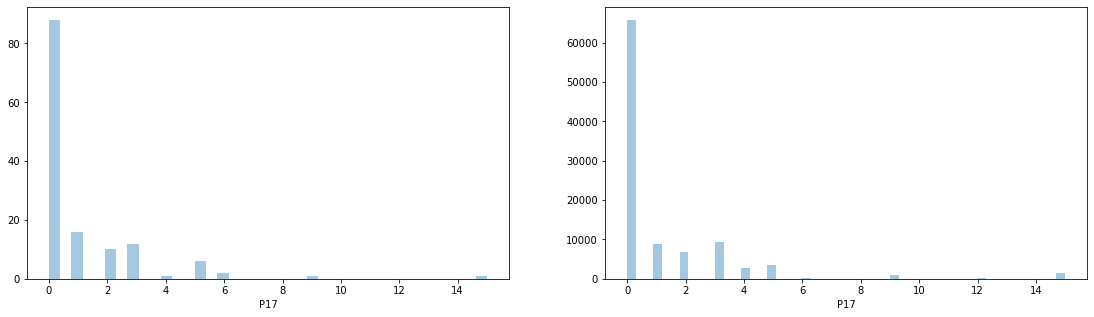

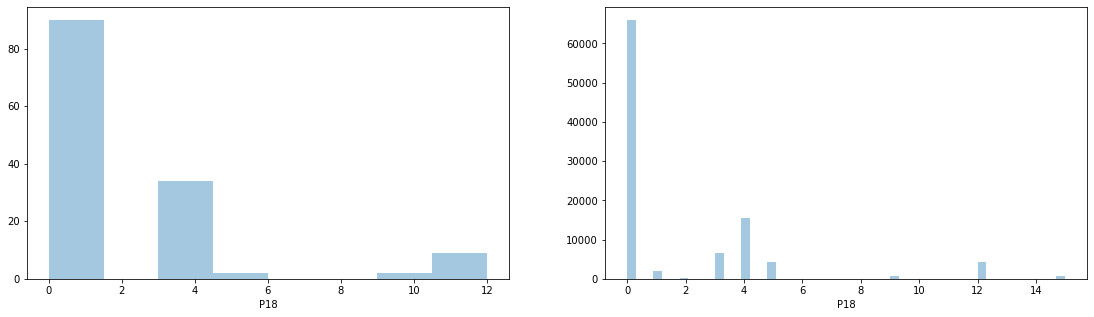

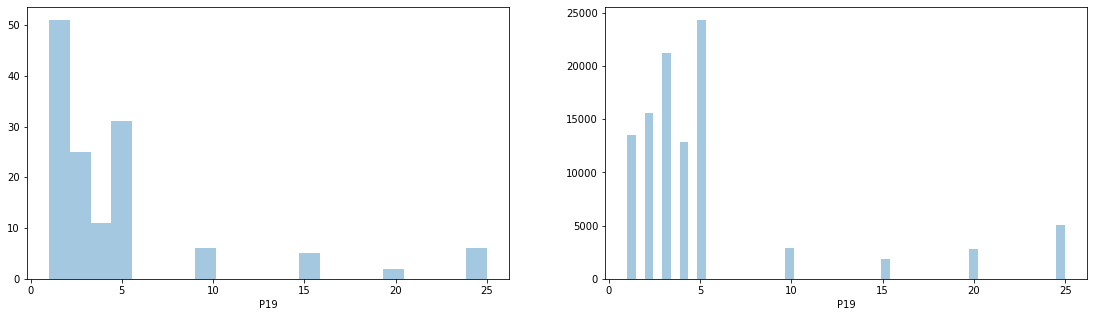

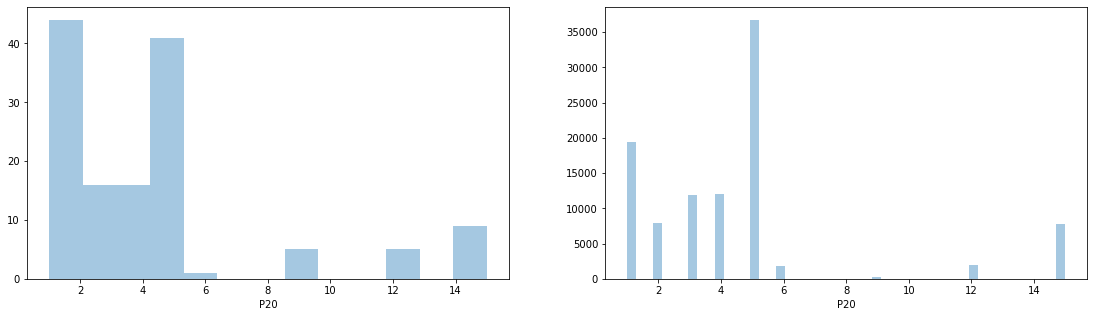

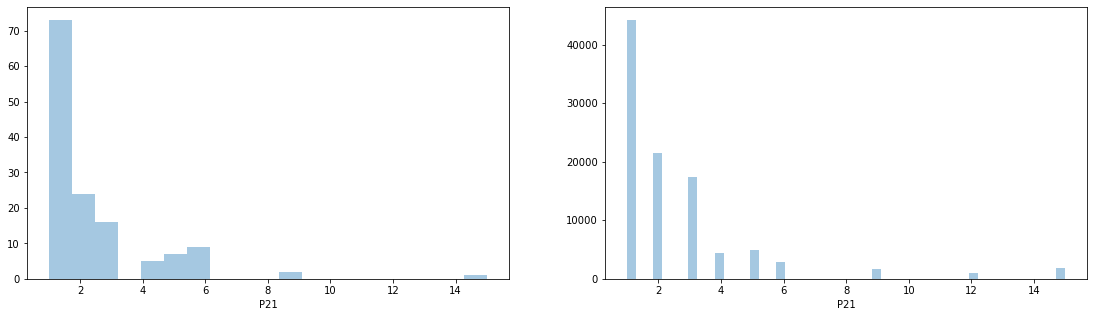

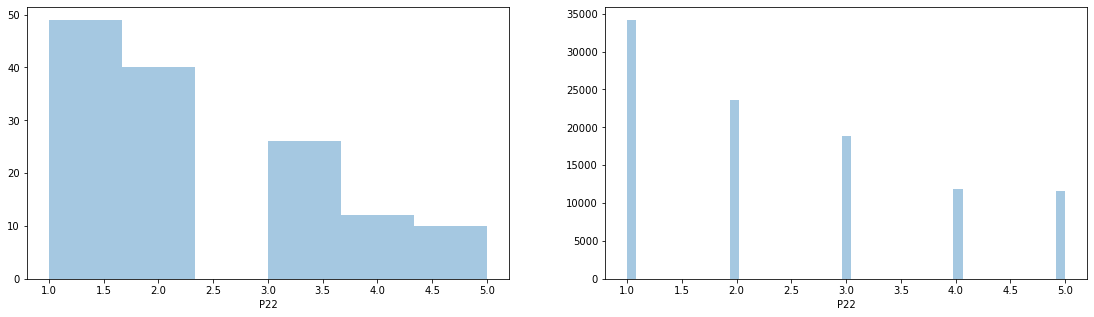

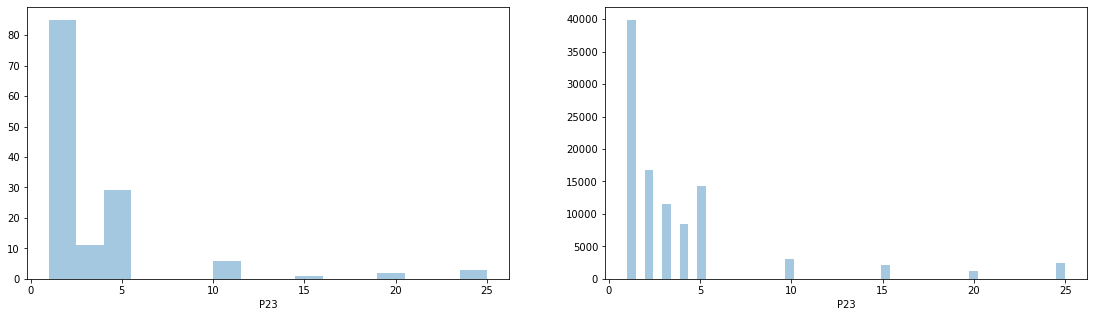

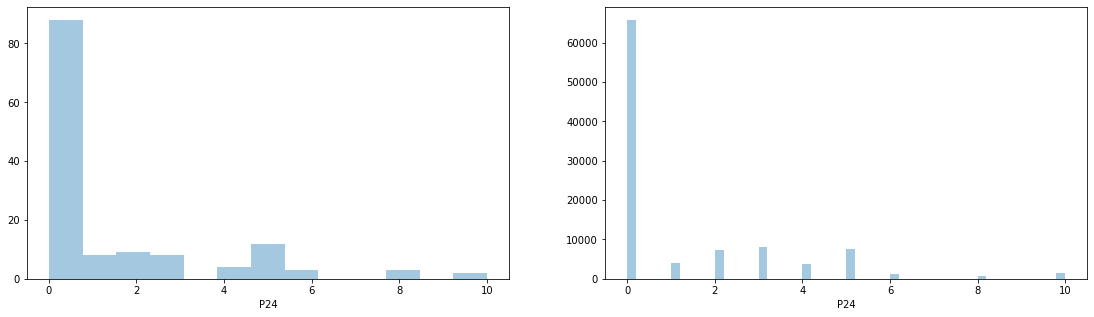

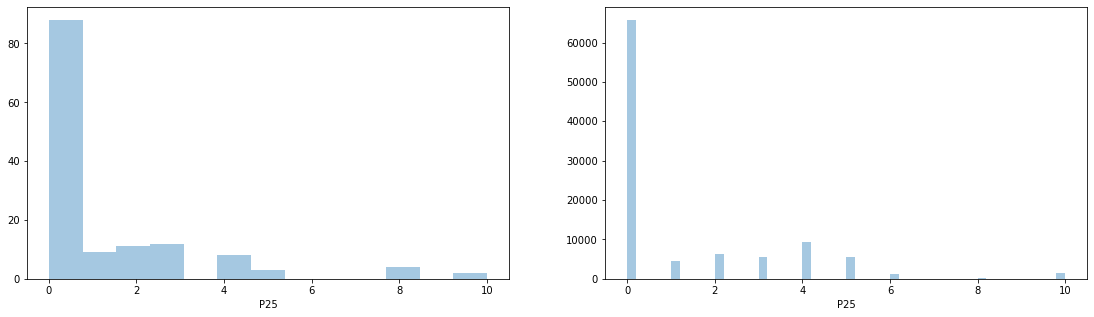

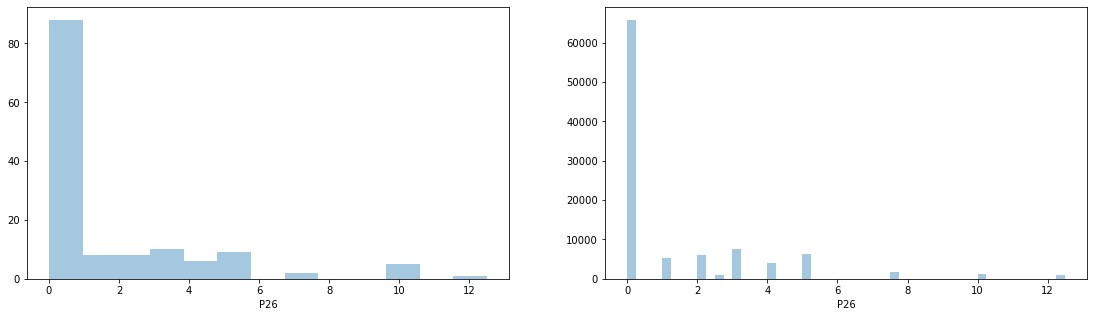

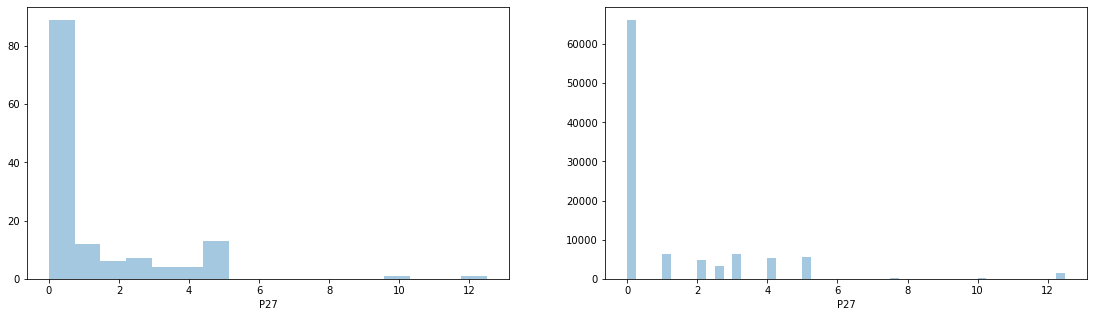

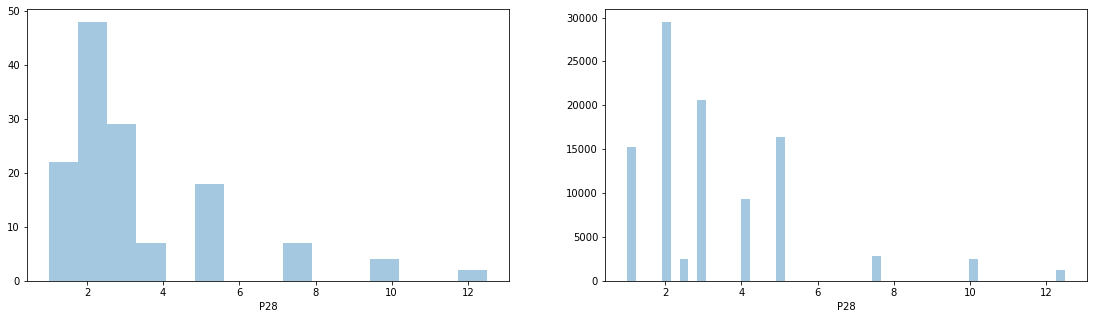

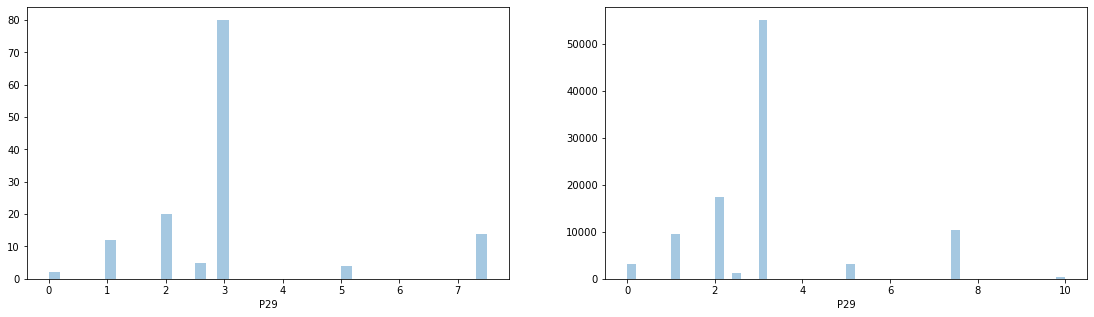

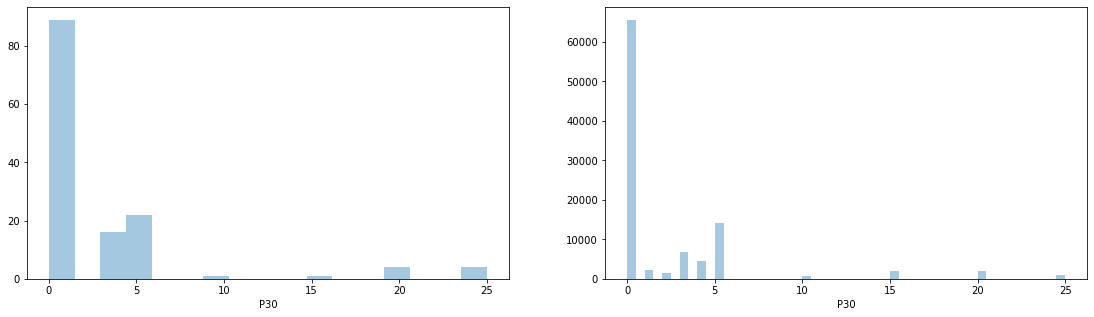

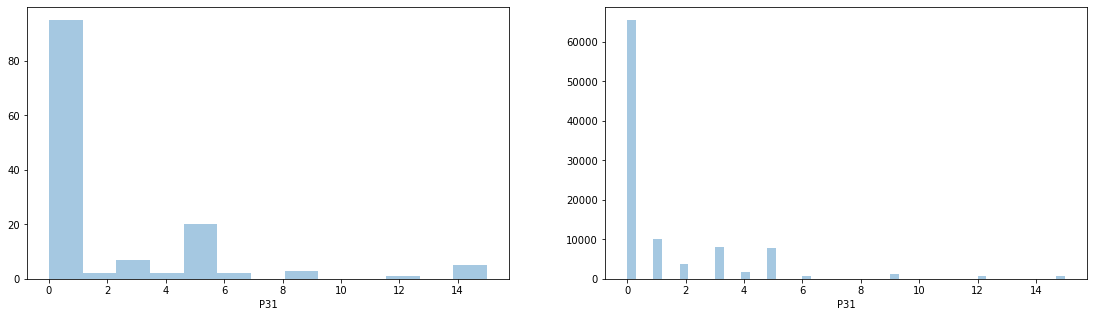

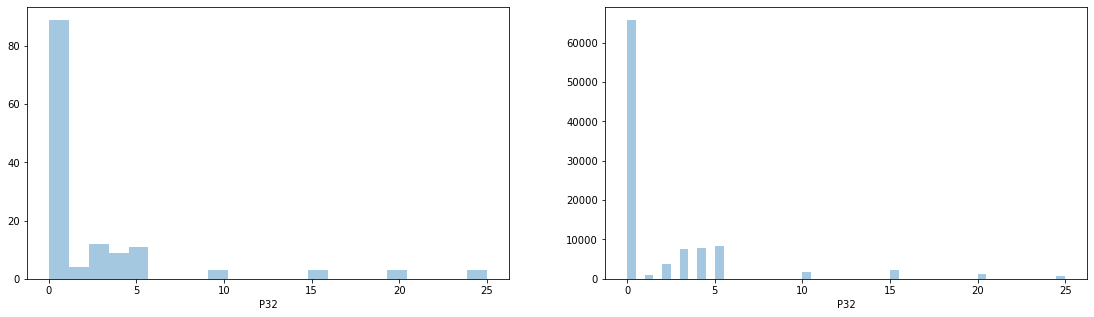

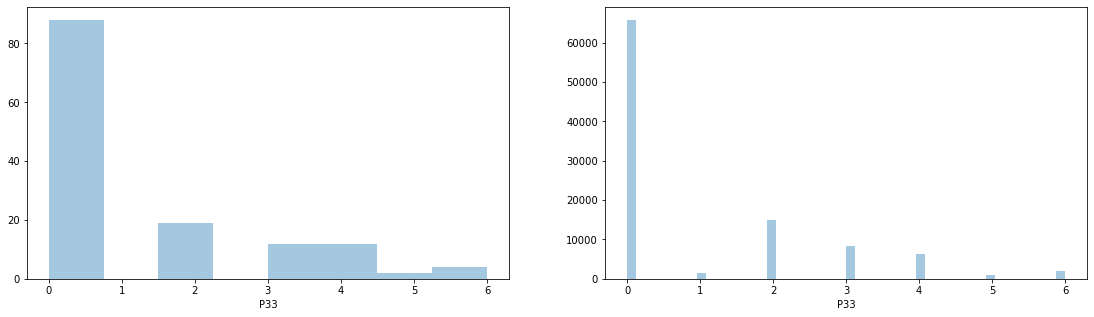

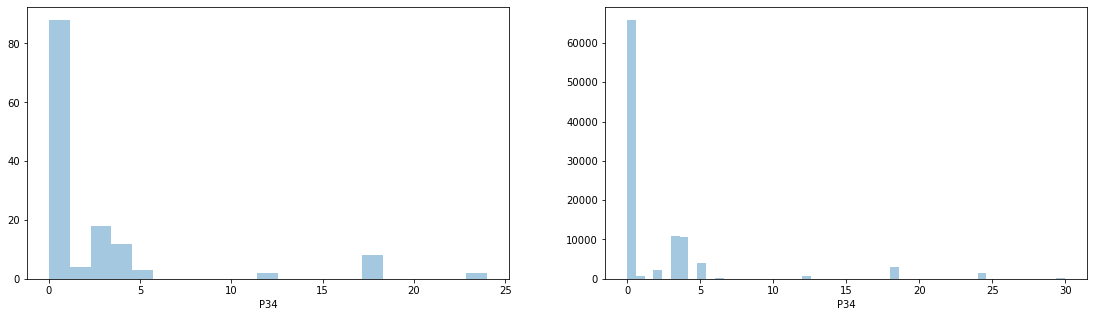

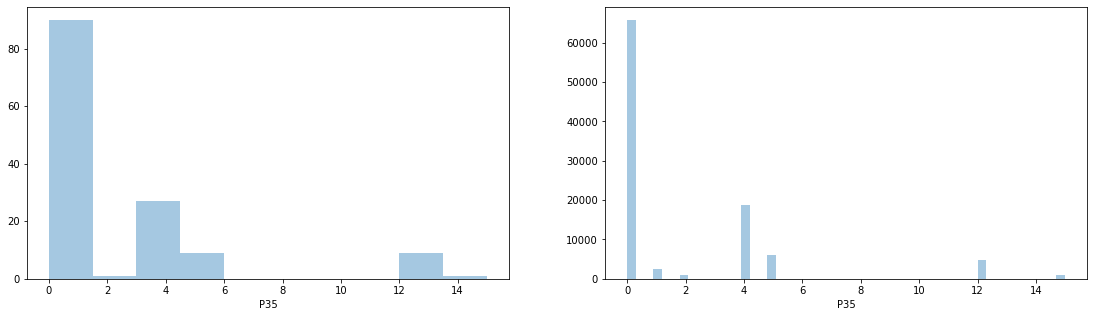

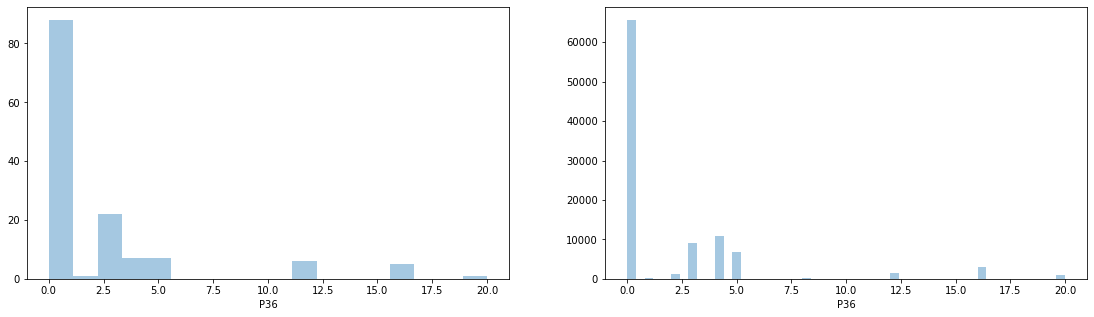

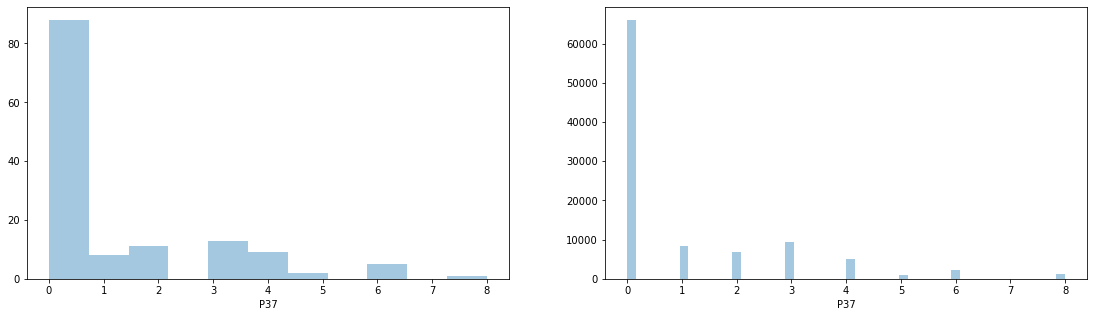

In [216]:

plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    G1 = sns.distplot(train_df['P{}'.format(i)], ax=ax[0], kde=False);
    G2 = sns.distplot(test_df['P{}'.format(i)], ax=ax[1], kde=False);
    fig.show()

Multivariate imputation by chained equations (also known as MICE) was used to replace the missing values in some of these features. The way it works is that is uses the entire set of available data to estimate the missing values.

In [217]:
train_df.dtypes

City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
Days Open     float64
dtype: object

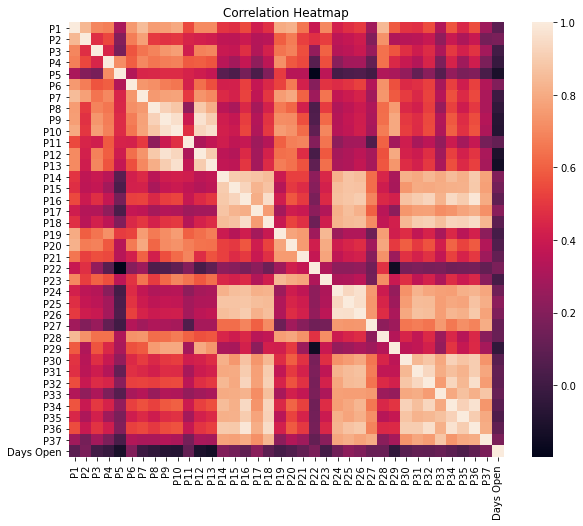

In [218]:
#correlation between numberic features with revenue
plt.figure(figsize=(10,8))
sns.heatmap(train_df.drop(['revenue','City Group','Type'],axis=1).corr(),square=True)
plt.title('Correlation Heatmap')
plt.show()

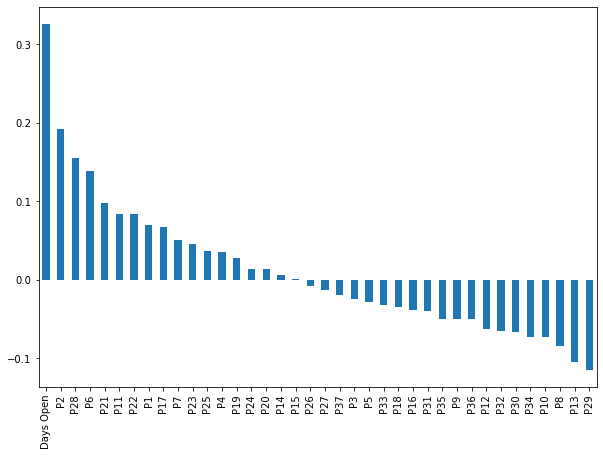

In [219]:
#Correlation with revenue 
Corr_with_revenue = train_df.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
Corr_with_revenue.drop('revenue').plot.bar()
plt.show();

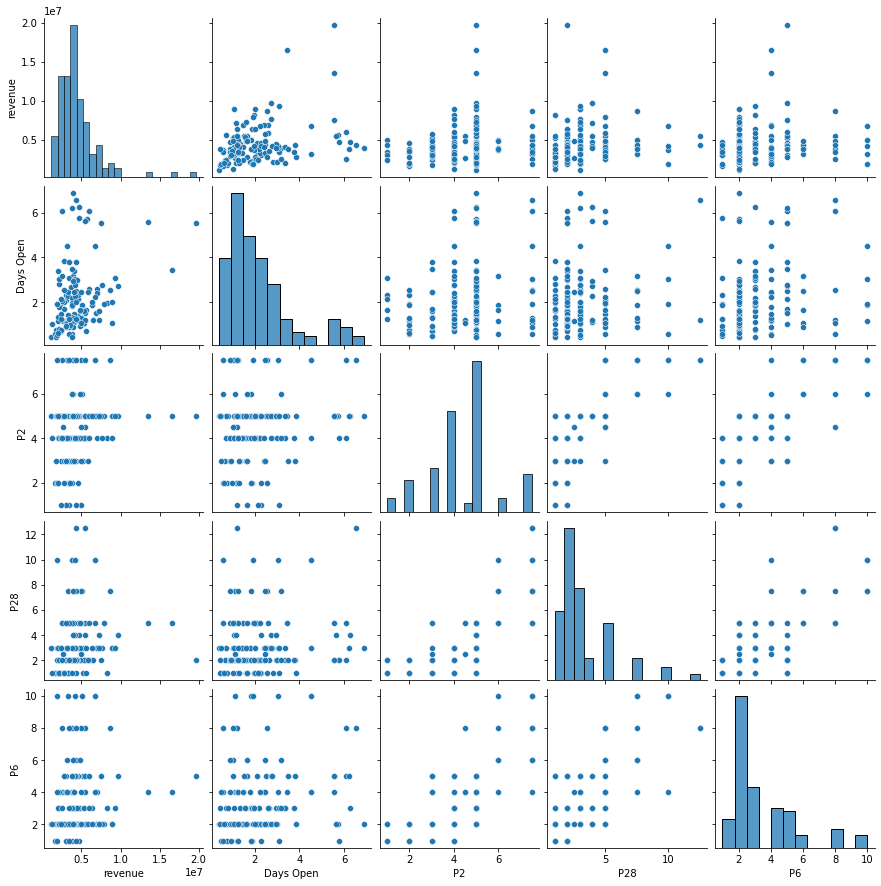

In [220]:
sns.pairplot(train_df[train_df.corr()['revenue'].sort_values(ascending=False).index[:5]])
plt.show()

# Training the dataset

In [221]:
train_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days Open
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,0.744
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,25,12,10,6,18,12,12,6,2675511.0,1.145
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,5,1,3,2,3,4,3,3,4316715.0,2.144


In [222]:
columnsToEncode = train_df.select_dtypes(include=[object]).columns
train_df = pd.get_dummies(train_df, columns=columnsToEncode, drop_first=False)

In [223]:
train_df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P35,P36,P37,revenue,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,4,3,4,5653753.0,5.728,1,0,0,0,1
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,6923131.0,2.594,1,0,0,1,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,2055379.0,0.744,0,1,0,0,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,12,12,6,2675511.0,1.145,0,1,0,0,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,4,3,3,4316715.0,2.144,0,1,0,0,1


In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X = train_df.drop(columns=['revenue'],axis=1)
y = train_df['revenue']

In [226]:
print(X.shape)
print(y.shape)

(137, 43)
(137,)


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=118)

In [228]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(109, 43)
(28, 43)
(109,)
(28,)


# KNN Regression

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [230]:
# Defining the parameters for the Gridsearch 
knn_params = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

In [231]:
# Initiating the KNN model for the search
knn = KNeighborsRegressor()

In [232]:
# Initializing the gridsearch for the above KNN model and the parameter set
# We are checking the performance of the model based on the RMSE metric
# We use k-fold Cross Validation technique for training, testing and validating the model with 10 folds.

knn_regressor = GridSearchCV(knn, knn_params, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)


In [233]:
# Fitting the above model with the training data
knn_regressor.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_root_mean_squared_error')

In [234]:
# fetching the best parameter value for the number of neighbors 
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
# Fetching the best score of the model
print(f'Best score: {knn_regressor.best_score_}')
# print(knn_regressor.best_params_)

Optimal neighbors: 7
Best score: -2011446.5717644643


Model creation using the above best performing parameters for the KNN model
# KNN Model

In [235]:
knn_model = KNeighborsRegressor(n_neighbors=7)

In [236]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [237]:
# knn_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train)

In [238]:
# print("Mean Squared Error", mean_squared_error(y_test,knn_pred))
# print("Root Mean Squared Error", np.sqrt(mean_squared_error(y_test,knn_pred)))
# print("R2 Score",r2_score(y_test,knn_pred))

print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, knn_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


Train r2 score:  -3.035247670281623
Test r2 score:  -1.773577647716015
Train RMSE: 1985756.8879
Test RMSE: 5558369.6499


# Random Forest Regression

In [239]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 30
Optimal max_features: 0.3
Optimal min_sample_leaf: 4
Optimal min_samples_split: 8
Optimal n_estimators: 30
Best score: -1979150.9469883204


In [241]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -1.8837850037646633
Test r2 score:  0.16511423390797486
Train RMSE: 1678889.4386
Test RMSE: 3049585.3280


## We conclude by seeing the model performance that Random forest fits the best 

# Predicting the revenue on the test dataset

In [242]:
test_df.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Days Open
0,0,Other,FC,1,4.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,1.521
1,1,Other,IL,3,4.0,4.0,4.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,1.466
2,2,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,0.509
3,3,Other,IL,2,4.0,4.0,4.0,2,3,5,...,3.0,0,4,0,0,0,0,0,0,0.686
4,4,Other,FC,2,4.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,0.600


In [243]:
test_df.drop(columns=['Id'],axis=1,inplace=True)
columnsToEncode = test_df.select_dtypes(include=[object]).columns
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)

In [244]:
test_df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P34,P35,P36,P37,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,1.521,0,1,0,1,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,1.466,0,1,0,0,1
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,0.509,1,0,0,1,0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,0,0,0,0,0.686,0,1,0,0,1
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,0.600,0,1,0,1,0


In [245]:
y_test_pred = rf_model.predict(test_df)

In [247]:
test_df['Predicted Revenue'] = y_test_pred

In [249]:
test_df['Predicted Revenue'] = test_df['Predicted Revenue'].apply(lambda x:round(x,2))

In [250]:
test_df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P35,P36,P37,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Predicted Revenue
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,1.521,0,1,0,1,0,4748602.40
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,1.466,0,1,0,0,1,3640636.69
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0.509,1,0,0,1,0,4412430.63
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,0,0,0,0.686,0,1,0,0,1,3550657.21
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0.600,0,1,0,1,0,5043717.39


In [251]:
test_df.to_csv("PredictedRevenue.csv")